# Wordle Words Algorithm Design

## Aim

The aim of the notebook is to carry the work forward done by Wordle Investigate to find a way to use the wordlist. There are two aims:
- Should always win
- Should be fast

### Why use scoreing methods

Scoring will help kind of choose the most optimal starting point or one of the most optimal starting points mathematically. One of the main issues after working with this would be a way to parse through these word/scoring lists as fast as possible - as when the comparisons need to be made using the hints provided by the game, if there is no fast method then it would waste a lot of time, and thus would not be efficient at all. It is a secondary problem for now.

### What Scoring should Accomplish

It should allow the two main features which will help narrow down the word options as fast as possible. It must be noted, it is still a algorithm that will be dealing with probabilities - which the scoring system will replicate. Through the scoring system, the best probabilites can be choosen to narrow down the word list as fast as possible.

### The solver algorithm will achieve the following

- Choose the best word(s) for the first input
- Choose the best word(s) for the second input
- ...
- Choose the best word(s) for the nth input (n <= 6)

### Criterias which determine the best choice nature

Best choice, means the word which would narrow down the word search the most out of the others. There are three factors that do this and I don't know how to use one or either of them to achieve them as of now. 

Say you have a word with 5 letters. To see if its the best algorithm you will need to analyse the following
- For each character of the word
  - How many other words {from the answer} exist which have that character in exactly the same place. **LETS CALL IT THE POPULARITY OF A CHAR IN THE WORD**
  - How often is this character to appear in a word. **LETS CALL IT THE PROBABILITY OF A CHAR IN THE WORD**
- The combined effect of 5 character's **POPULARITY** and **PROBABILITY**

$$P(c) = \frac{\sum_{w \in W} I(c, w)}{|W|}$$

$$\begin{align*}
P(c) & : \text{Probability of character } c \text{ appearing in a word.} \\
W & : \text{Set of all words.} \\
I(c, w) & : 
\begin{cases} 
1, & \text{if character } c \text{ appears exactly once in word } w, \\
0, & \text{otherwise.}
\end{cases} \\
|W| & : \text{Total number of words.}
\end{align*}$$

## The different things that can be graphed here

Say word $w$ is made up of $a_1, a_2, a_3, a_4, a_5$ in the exact order.

### Point 1

$a_1 \in \{...\}$  
$a_2 \in \{...\}$  
$a_3 \in \{...\}$  
$a_4 \in \{...\}$  
$a_5 \in \{...\}$  

### Point 2

Where $x_n$ represents all possible combination of english alphabets,  

$P(a_1 = x_n) = ?$  
$P(a_2 = x_n) = ?$  
$P(a_3 = x_n) = ?$  
$P(a_4 = x_n) = ?$  
$P(a_5 = x_n) = ?$  

### Point 3

Where $x_n$ represents all possible combination of english alphabets,  

$P(x_n \in w) = ?$

### Point 4

$P(a_i = a_j) = ?$

## Data Organisation

Tables:
|   $a_1$  |  $a_2$  |  $a_3$  |  $a_4$  |  $a_5$  |
| -------- | ------- | ------- | ------- | ------- |
| R        |  I      | G       | H       | T       |
| B        | 0       | X       | E       | R       |
| D        | E       | A       | T       | H       |
| K        | I       | L       | L       | S       |

In [21]:
# Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

answer_path = "nyt-wordle-answers-alphabetical.txt"
data = {
    "a_1": [],
    "a_2": [],
    "a_3": [],
    "a_4": [],
    "a_5": [],
}

with open(answer_path) as fh:
    for line in fh:
        word = line.strip()
        data["a_1"].append(word[0])
        data["a_2"].append(word[1])
        data["a_3"].append(word[2])
        data["a_4"].append(word[3])
        data["a_5"].append(word[4])

data_df = pd.DataFrame(data)
display(data_df)

,a_1,a_2,a_3,a_4,a_5
0,a,b,a,c,k
1,a,b,a,s,e
2,a,b,a,t,e
3,a,b,b,e,y
4,a,b,b,o,t
...,...,...,...,...,...
2304,y,o,u,n,g
2305,y,o,u,t,h
2306,z,e,b,r,a
2307,z,e,s,t,y


In [ ]:
# Point 1

letters = [letter for letter in string.ascii_lowercase]

for letter_pos in range(1, 6):
    if len(set(data["a_{}".format(letter_pos)])) == 26:
        print("a_{} is fully utilised".format(letter_pos))
        continue

    missing = []
    for letter in letters:
        if letter not in set(data["a_{}".format(letter_pos)]):
            missing.append(letter)
    print("a_{} has {} missing".format(letter_pos, ", ".join(missing)))

a_1 has x missing
a_2 is fully utilised
a_3 is fully utilised
a_4 has q missing
a_5 has j, q, v missing


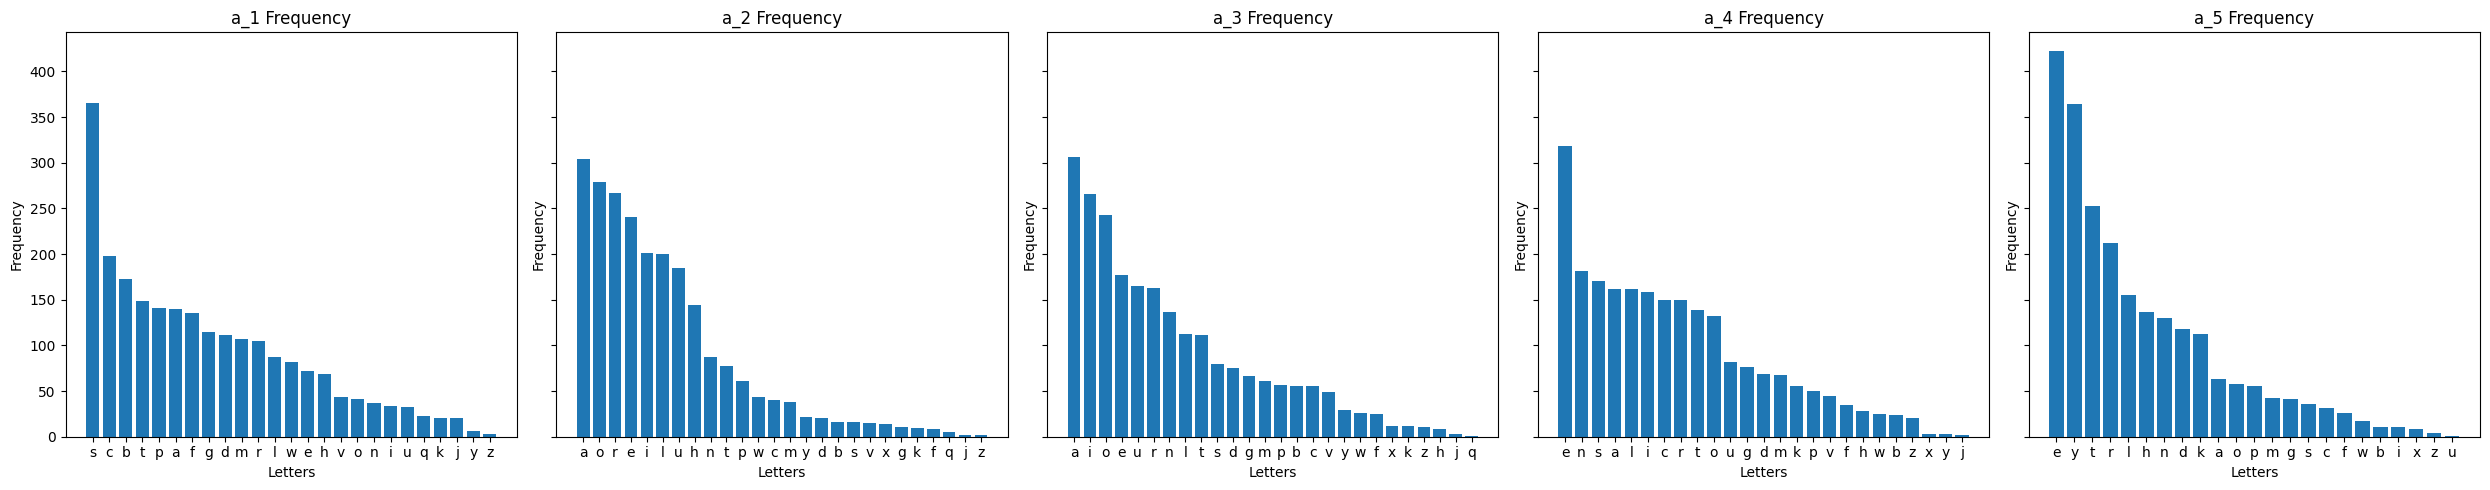

In [ ]:
## Point 2 - Frequency

a_1_frequency = data_df.groupby(["a_1"]).size().sort_values(ascending=False)
a_2_frequency = data_df.groupby(["a_2"]).size().sort_values(ascending=False)
a_3_frequency = data_df.groupby(["a_3"]).size().sort_values(ascending=False)
a_4_frequency = data_df.groupby(["a_4"]).size().sort_values(ascending=False)
a_5_frequency = data_df.groupby(["a_5"]).size().sort_values(ascending=False)


frequencies = [a_1_frequency, a_2_frequency, a_3_frequency, a_4_frequency, a_5_frequency]
titles = ["a_1 Frequency", "a_2 Frequency", "a_3 Frequency", "a_4 Frequency", "a_5 Frequency"]

fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True)

for i, (freq, title) in enumerate(zip(frequencies, titles)):
    axes[i].bar(freq.index, freq.values)
    axes[i].set_title(title)
    axes[i].set_xlabel('Letters')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [68]:
# Point 2 - Probability (in form of percent as the numbers are better looking)

total_rows = len(data_df)

a_1_probability = data_df.groupby(["a_1"]).size().div(total_rows).mul(100)
a_2_probability = data_df.groupby(["a_2"]).size().div(total_rows).mul(100)
a_3_probability = data_df.groupby(["a_3"]).size().div(total_rows).mul(100)
a_4_probability = data_df.groupby(["a_4"]).size().div(total_rows).mul(100)
a_5_probability = data_df.groupby(["a_5"]).size().div(total_rows).mul(100)

probability_df = pd.DataFrame({
    "a_1_probability": a_1_probability,
    "a_2_probability": a_2_probability,
    "a_3_probability": a_3_probability,
    "a_4_probability": a_4_probability,
    "a_5_probability": a_5_probability,
}, index=pd.Index(letters)).fillna(0)


display(probability_df)

,a_1_probability,a_2_probability,a_3_probability,a_4_probability,a_5_probability
a,6.063231,13.165873,13.252490,7.016024,2.728454
b,7.492421,0.692941,2.425292,1.039411,0.476397
c,8.575141,1.732352,2.425292,6.496319,1.342573
d,4.807276,0.866176,3.248159,2.988307,5.110437
e,3.118233,10.437419,7.665656,13.772196,18.276310
f,5.846687,0.346470,1.082720,1.515808,1.126029
g,4.980511,0.476397,2.901689,3.291468,1.775660
h,2.988307,6.236466,0.389779,1.212646,5.933304
i,1.472499,8.705067,11.520139,6.842789,0.476397
j,0.866176,0.086618,0.129926,0.086618,0.000000


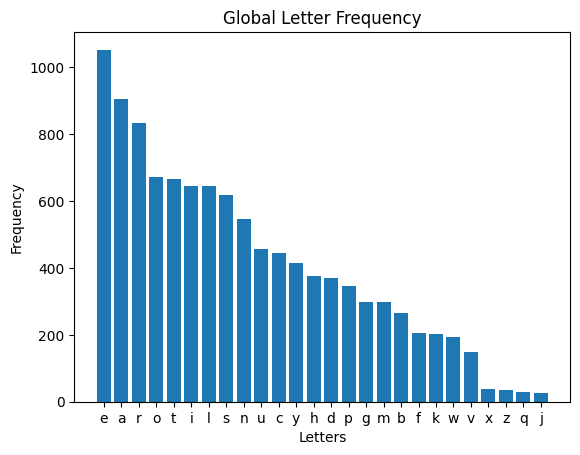

In [74]:
# Point 3 - Frequency

global_letter_frequency = {}
for letter in letters:
    global_letter_frequency[letter] = 0

for row in data_df.itertuples():
    for letter in set([row.a_1, row.a_2, row.a_3, row.a_4, row.a_5]):
        global_letter_frequency[letter] += 1

global_letter_frequency_unsort = global_letter_frequency
global_letter_frequency = dict(sorted(global_letter_frequency.items(), key=lambda x: x[1], reverse=True))

plt.title('Global Letter Frequency')
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.bar(global_letter_frequency.keys(), global_letter_frequency.values())
plt.show()

In [75]:
# Point 3 - Probability (in percent)

total = sum(global_letter_frequency_unsort.values())
global_letter_probability = {}

for key in global_letter_frequency_unsort:
    global_letter_probability[key] = global_letter_frequency_unsort[key] / total * 100

global_letter_probability = pd.DataFrame({
    "probability": global_letter_probability.values(),
}, index=pd.Index(letters))

display(global_letter_probability)

,probability
a,8.436540
b,2.476953
c,4.153087
d,3.445386
e,9.805382
f,1.918242
g,2.784244
h,3.510569
i,6.015458
j,0.251420


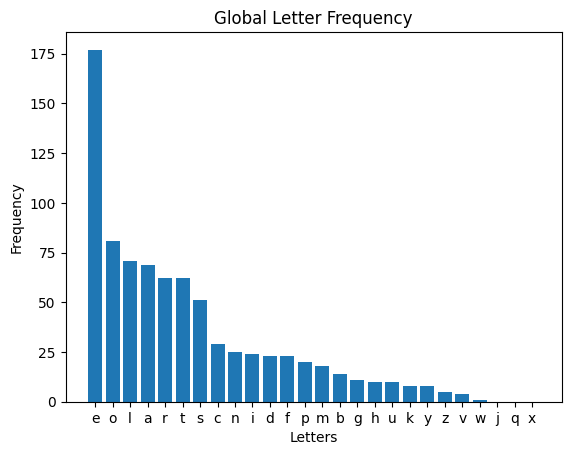

In [ ]:
# Point 4 - Frequency

global_letter_duplicate_frequency = {}
for letter in letters:
    global_letter_duplicate_frequency[letter] = 0

for row in data_df.itertuples():
    row_values = [row.a_1, row.a_2, row.a_3, row.a_4, row.a_5]

    seen = set()
    duplicates = []

    for letter in row_values:
        if letter in seen:
            if letter not in duplicates:
                global_letter_duplicate_frequency[letter] += 1
        else:
            seen.add(letter)

global_letter_duplicate_frequency_unsort = global_letter_duplicate_frequency
global_letter_duplicate_frequency = dict(sorted(global_letter_duplicate_frequency.items(), key=lambda x: x[1], reverse=True))

plt.title('Global Letter Frequency Duplicate')
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.bar(global_letter_duplicate_frequency.keys(), global_letter_duplicate_frequency.values())
plt.show()

In [78]:
# Point 4 - Probability (in Percent)

total = sum(global_letter_duplicate_frequency_unsort.values())
global_letter_duplicate_probability = {}

for key in global_letter_duplicate_frequency_unsort:
    global_letter_duplicate_probability[key] = global_letter_duplicate_frequency_unsort[key] / total * 100

global_letter_duplicate_probability = pd.DataFrame({
    "probability": global_letter_duplicate_probability.values(),
}, index=pd.Index(letters))

display(global_letter_duplicate_probability)

,probability
a,8.560794
b,1.736973
c,3.598015
d,2.853598
e,21.960298
f,2.853598
g,1.364764
h,1.240695
i,2.977667
j,0.000000
